# Guía ANOVA factorial

**Ejercicio 3:** Se ha realizado un diseño de experimentos para estudiar la calidad de las soldaduras, el objetivo es determinar si existen diferencias entre las soldaduras según el elemento de soldadura que se utilice entre tres posibles: nı́quel, hierro o cobre. Como pueden haber diferencias significativas entre los elementos a soldar se ha utilizado un diseño de bloques completamente aleatorizados. Para ello se han utilizado
diez lingotes (bloques) y de cada uno de ellos se han soldado dos componentes utilizando los tres tipos de soldadura. Finalmente se mide la fuerza (expresada en 100 libras por pulgada cuadrada) necesaria para romper la soldadura. Los resultados obtenidos son los de la tabla adjunta. En base a estos datos estudiar la influencia de factor “tipo de soldadura”, ¿cambian los resultados si no se tiene en cuenta el bloque “lingote”?.

**a)** Escriba un modelo lineal para el experimento, explique los términos utilizados en el mismo y realice el análisis de varianza.

$$y_{ijk}=\mu + \alpha_i + \beta_j + \epsilon_{ijk}$$

donde $\alpha$ es el efecto del tratamiento (distintas soldaduras), $\beta_j$ es el efecto del bloque (distintos lingotes) y $\epsilon_{ijk}$ el error o residuos. 

In [4]:
# leemos los datos y acomodamos los factores
setwd("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/02_disenio_factorial_y_bloques/datos/")
datos = read.csv("Fuerza_soldadura.csv", sep=",")
head(datos)
#str(datos)
attach(datos)
lingoteB = as.factor(lingote)
soldaduraF = as.factor(soldadura)

soldadura,lingote,fuerza
niquel,1,76.0
niquel,2,66.3
niquel,3,68.9
niquel,4,74.7
niquel,5,73.0
niquel,6,72.7


The following objects are masked from datos (pos = 3):

    fuerza, lingote, soldadura



In [5]:
# hacemos el analisis de la varianza
modelo = aov(fuerza~lingoteB+soldaduraF)
summary(modelo)

            Df Sum Sq Mean Sq F value Pr(>F)
lingoteB     9  509.9   56.66   1.797  0.139
soldaduraF   2  138.4   69.21   2.194  0.140
Residuals   18  567.7   31.54               

De estos resultados vemos:

- Las distintas soldaduras tenemos un p-valor de 0.140, valor superior a $\alpha = 0.05$ por lo que no podemos rechazar la H0, así que entonces diríamos que todos los métodos son estadísticamente iguales.

- Para el bloque vemos que el p-valor es de 0.139 por lo que del mismo modo podríamos decir que los diferentes lingotes tampoco afectan.

In [6]:
modelo = aov(fuerza~soldaduraF)
summary(modelo)

            Df Sum Sq Mean Sq F value Pr(>F)
soldaduraF   2  138.4   69.21   1.734  0.196
Residuals   27 1077.6   39.91               

**b)** ¿Cuáles son las suposiciones necesarias para que el análisis de varianza sea válido? Analice la validez de dichos supuestos.

- Normalidad de los datos
- Varianza constante
- Independencia entre los distintos factores

Veremos con los resultados a continuación de la validez de estos supuestos:

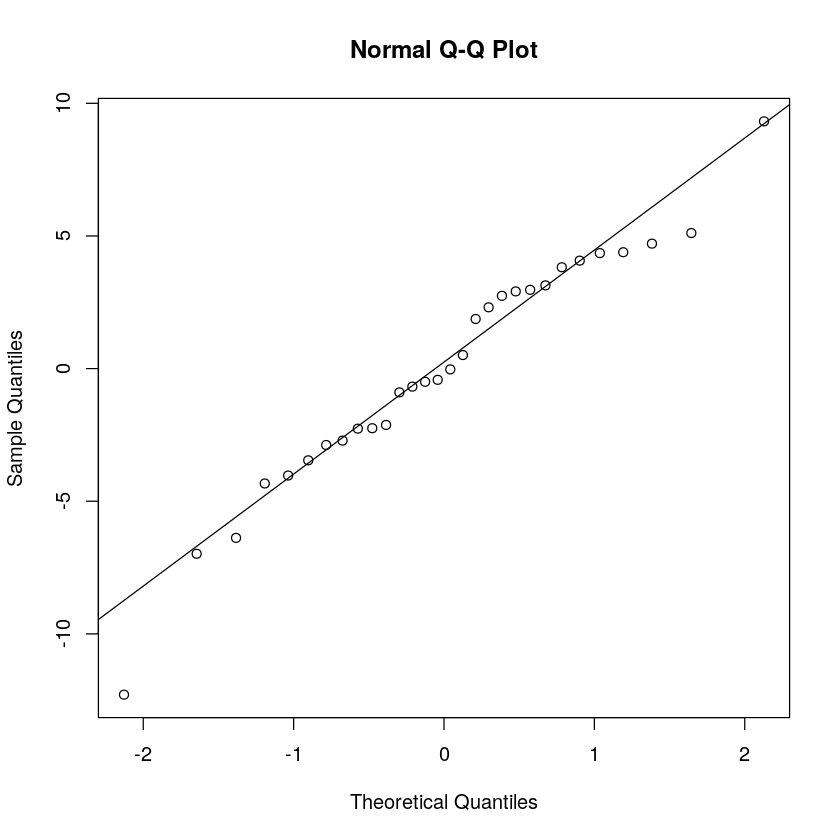

In [9]:
# Inicialmente hacemos un gráfico exploratorio para analizar la normalidad
qqnorm(modelo$residuals)
qqline(modelo$residuals)

In [3]:
# Hacemos el test de Shapiro-Wilk 
# pvalor grande => aceptamos H0: Normalidad
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.96712, p-value = 0.4637


In [11]:
# Para la varianza hacemos el test de Levene
# pvalor grande => aceptamos H0:Varianzas constantes
library(car)
leveneTest(fuerza~soldaduraF)

,Df,F value,Pr(>F)
group,2,2.585668,0.09388105
,27,NA,NA


**c)** Considere que el tipo de soldadura utilizado normalmente es hierro. Use el método de Dunnett para probar la diferencia entre el hierro y cada uno de los otros tipos de soldaduras.

Veamos primeramente el orden de los niveles del factor soldadura:

In [4]:
levels(soldaduraF)

[1] "cobre"  "hierro" "niquel"

Debemos reacomodar para dejar en primer lugar al hierro, ya que R tomará como control el que esté en la primer posición, notar que el factor reordenado ahora se comienza con S mayúscula. 

In [7]:
# reordenamos los niveles del factor
SoldaduraF = factor(soldaduraF, levels=c('hierro', 'cobre', 'niquel'))
modelo2 = aov(fuerza~SoldaduraF+lingoteB)
summary(modelo2)

            Df Sum Sq Mean Sq F value Pr(>F)
SoldaduraF   2  138.4   69.21   2.194  0.140
lingoteB     9  509.9   56.66   1.797  0.139
Residuals   18  567.7   31.54               

In [16]:
# Estas comparaciones multiples dejan de tener sentido porque ya vimos por el pvalor
# que no hay diferencias entre las medias, asi que lo comento
#library(multcomp)
#T2 = glht(modelo2, linfct = mcp(SoldaduraF = "Dunnet"), alternative="two.sided")
#summary(T2)
#confint(T2, level = .95)

In [17]:
#plot(confint(T2, level = .95))

**d)** Calcule la potencia relativa de este diseño respecto a un diseño totalmente aleatorizado. ¿Cuáles son sus conclusiones?

In [8]:
# La idea es calcular la potencia del test usando el diseño con bloques, y la potencia del modelo 
# sin utilizar los bloques (es decir, considerando solo el factor tipo de soldadura)  y ver cuanto 
# mejora (o no) la potencia al considerar los bloques (por eso potencia relativa, ver cuanto da el 
# cociente entre la potencia con y sin bloques). Me explico??

Sobre esto dijo el profesor en clases:

- Nos pide que comparemos la (potencia con el bloque) / (potencia comun)
- El D que necesitamos podemos usar cualquiera, dice que se lo olvidaron, pero podriamos tener varios y hacer una curva

In [2]:
# potencia (modelo con bloques)
D = 5
b = 10 # cantidad de bloques
a = 3 # niveles por factor
MSE = 31.54
lambda = b*D^2/(2*MSE)
alpha = 0.05
A = qf(1-alpha, a-1, (a-1)*(b-1))
(potenciaCON = 1-pf(A, a-1, (a-1)*(b-1), lambda))

[1] 0.3553209

In [3]:
# potencia (modelo SIN bloques)
D = 5
b = 10 # replicas por nivel del factor
a = 3 # niveles por factor
MSE = 39.91
lambda = b*D^2/(2*MSE)
A = qf(1-alpha, a-1, a*b-a) # (a-1)*(b-1)
(potenciaSIN = 1-pf(A, a-1, a*b-a, lambda))

[1] 0.3027014

In [6]:
# potencia relavita
(potenciaCON/potenciaSIN)

# con bloques tenemos mas potencia como es de esperar

[1] 1.279113

- Obtenemos mayor potencia **CON** bloques ya que el MSE es menor, por lo tanto la F se desplaza mas a la derecha ya que el parámetro de no centralidad $\lambda$ da mayor. 

- Para el caso **SIN** bloques, el MSE nos da mayor ya que no se le resta el error de los bloques, de esta manera al calcular el parámetro de no centralidad $\lambda$ la F se desplaza menos. 